<a href="https://colab.research.google.com/github/uzair-ds/learnings-notebooks/blob/main/lenet_cnn_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Architecture Implementations

## Example-1

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
model = Sequential()

We flatten the input data using reshape to convert each 28x28 image into a 1D array of length 784.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

###### **Why to transform to 1D array ?**
- A 1D input is simpler for neural networks to process. By flattening the input, you transform the image data into a format that these layers can handle.

- Flattening ensures that each input sample has a consistent number of features. In the case of MNIST, each image is 28x28 pixels, so flattening it results in a vector of length 784. This consistency is important for creating a consistent architecture.


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Sequential models in Keras are a type of neural network architecture that's specifically designed for building deep learning models with a linear stack of layers. These models are called "sequential" because you can simply add one layer at a time, and the output of each layer is passed as input to the next layer. Sequential models are commonly used for feedforward neural networks, where data flows in one direction from input to output.

Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.

In [ ]:
model.add(Dense(128, input_dim=(784,), activation='relu'))



1.  *model.add* is used to add a layer to our neural
network. We need to specify as an argument what type of layer we want.  
2. The Dense is used to specify the fully connected layer.
3. output dimension here is 16 and input dimension is 20
4. Activation Function is ReLU is used here





In [ ]:
model.add(Dense(64, activation='relu'))

In [ ]:
model.add(Dense(10, activation="softmax"))

Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

 model.fit is used to train it.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2753 - accuracy: 0.9208
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1113 - accuracy: 0.9662
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0769 - accuracy: 0.9768
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0575 - accuracy: 0.9822
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0474 - accuracy: 0.9850
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0374 - accuracy: 0.9879
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0193 - accuracy: 0.993

## Example-2 : LeNet CNN Architecture

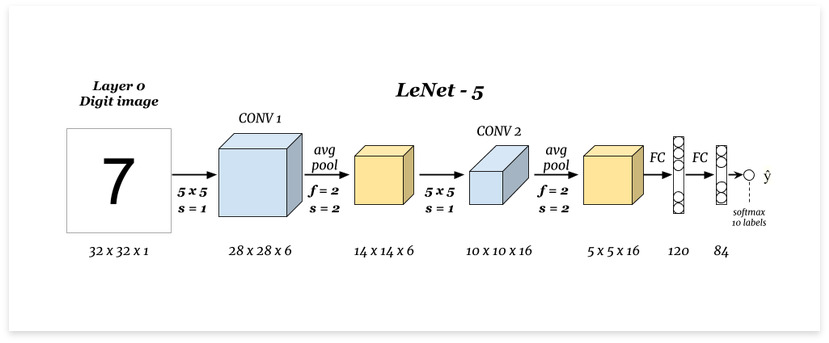

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to match LeNet's input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
model = Sequential()

# Layer 1: Convolutional Layer with ReLU activation and Max-Pooling
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# In above Layer 1 , we have used number of kernels = 6, therefore OutputChannels = 6

# Layer 2: Convolutional Layer with ReLU activation and Max-Pooling
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from previous layers
model.add(Flatten())

# Layer 3: Fully Connected Layer with ReLU activation
model.add(Dense(120, activation='relu'))

# Number of neurons in dense layer is 120

# Layer 4: Fully Connected Layer with ReLU activation
model.add(Dense(84, activation='relu'))

# Here number of neurons in dense layer is 84

model.add(Dense(10, activation='softmax'))



A dense layer, also known as a fully connected layer, is a fundamental building block in a neural network. It's called "dense" because every neuron in a dense layer is connected to every neuron in the previous layer.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 25s 64ms/step - loss: 1.2447 - accuracy: 0.5968 - val_loss: 0.5723 - val_accuracy: 0.8215
Epoch 2/5
375/375 [==============================] - 23s 62ms/step - loss: 0.4833 - accuracy: 0.8504 - val_loss: 0.3602 - val_accuracy: 0.8882
Epoch 3/5
375/375 [==============================] - 26s 68ms/step - loss: 0.3342 - accuracy: 0.8982 - val_loss: 0.2662 - val_accuracy: 0.9175
Epoch 4/5
375/375 [==============================] - 22s 58ms/step - loss: 0.2596 - accuracy: 0.9202 - val_loss: 0.2171 - val_accuracy: 0.9326
Epoch 5/5
375/375 [==============================] - 24s 64ms/step - loss: 0.2097 - accuracy: 0.9343 - val_loss: 0.1798 - val_accuracy: 0.9452
